## インストール

### PyTuning

pip install pytuning

### OpenSCAD
https://openscad.org

### solidpython
pip install solidpython

### Jupyter Renderer
pip install viewscad

## Jupyter Notebook設定

In [47]:
# 出力セルの高さが足りなければ、ここで調整

from IPython.core.display import display, HTML
#display(HTML("<style>.output { height:400px !important; }</style>"))
display(HTML("<style>.widget-html-content { height:300px !important; }</style>"))
#display(HTML("<style>.output_area { height:400px !important; }</style>"))
#display(HTML("<style>.widget-html-content { height:400px !important; }</style>"))

## 平均律と純正律を作成する

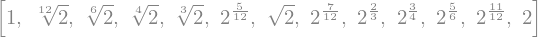

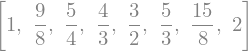

In [182]:
%matplotlib notebook
# ↑分数表示のために指定しておく
from pytuning.constants import five_limit_constructors
from pytuning.scales import create_diatonic_scale, \
                            create_edo_scale
edo_scale = create_edo_scale(12)       # 平均律
pure_scale = create_diatonic_scale(    # 純正律
                    five_limit_constructors, "TtsTtTs")
display(edo_scale); display(pure_scale)

## 平均律と純正律の和音波形を描く

In [1]:
from pytuning.constants import five_limit_constructors
from pytuning.scales import create_diatonic_scale, \
                            create_edo_scale
edo_scale = create_edo_scale(12)       # 平均律
pure_scale = create_diatonic_scale(    # 純正律
                    five_limit_constructors, "TtsTtTs")
display(edo_scale); display(pure_scale)

[1,
 2**(1/12),
 2**(1/6),
 2**(1/4),
 2**(1/3),
 2**(5/12),
 sqrt(2),
 2**(7/12),
 2**(2/3),
 2**(3/4),
 2**(5/6),
 2**(11/12),
 2]

[1, 9/8, 5/4, 4/3, 3/2, 5/3, 15/8, 2]

<Figure size 900x600 with 0 Axes>

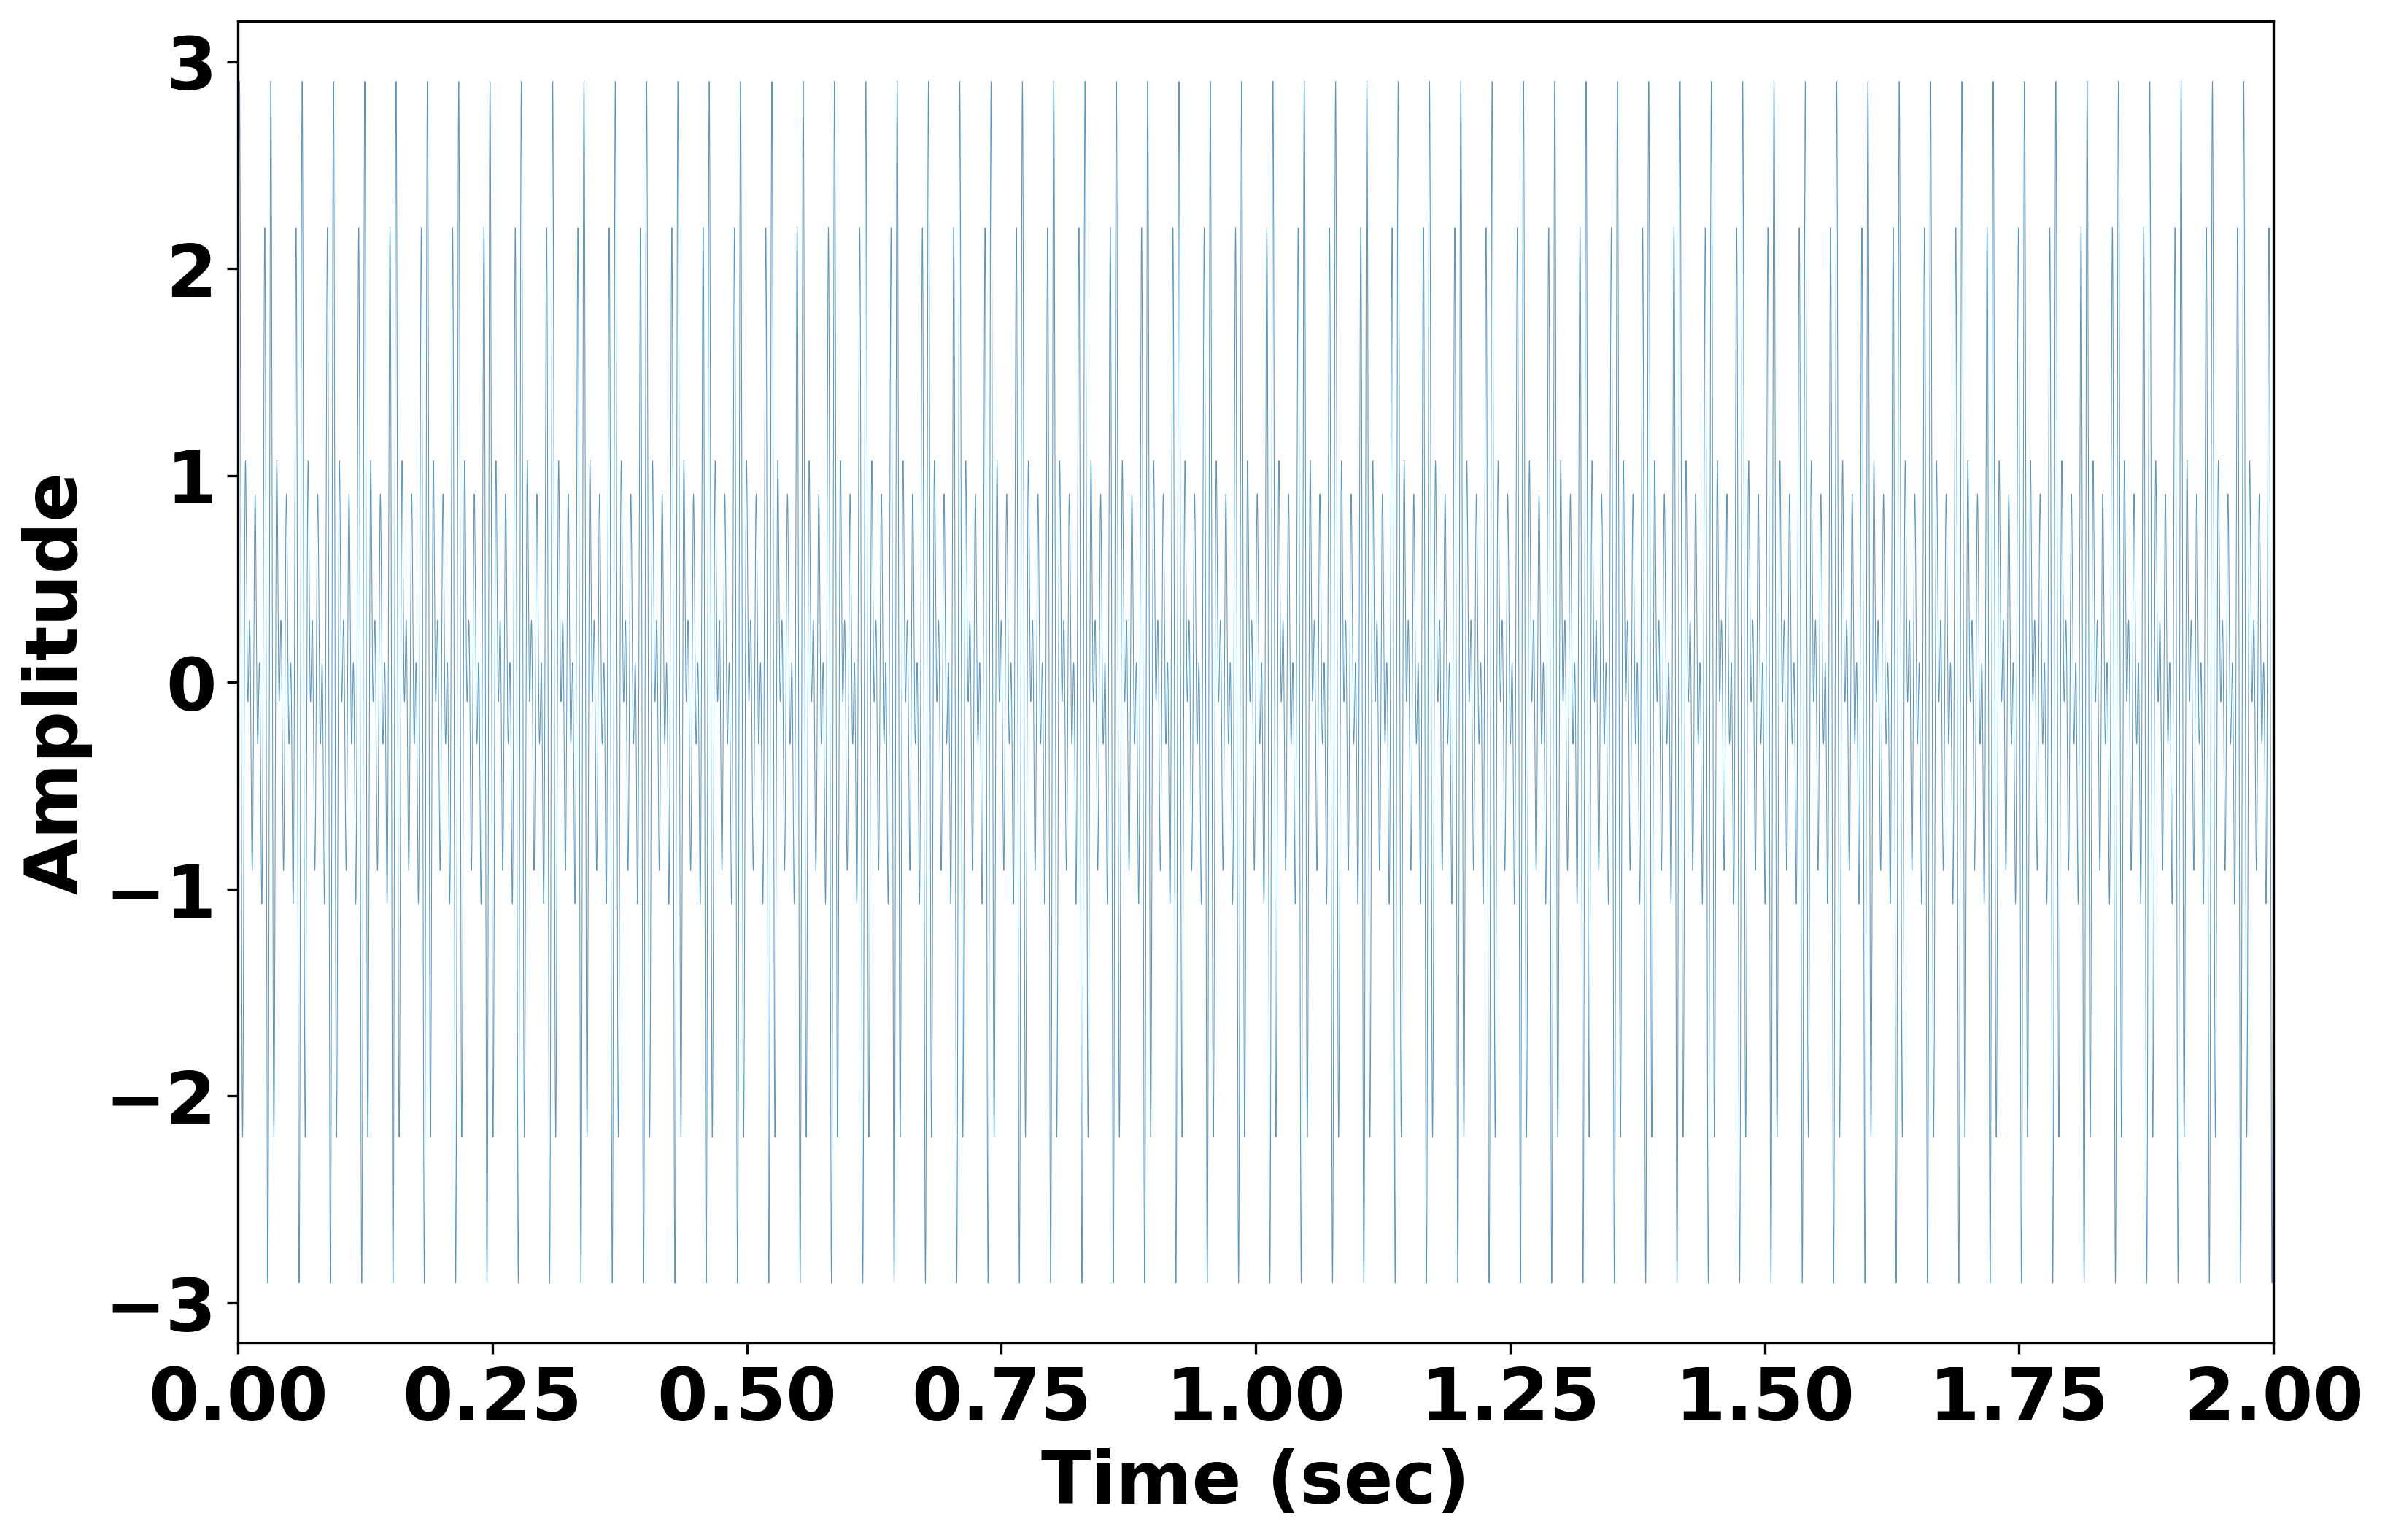

In [51]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

edo_scale = [float(s) for s in edo_scale] # 平均律
pure_scale = [float(s) for s in pure_scale] # 純正律

def make_sin_waves(freqs, t):
    data = np.zeros(len(t))
    for f in freqs:
        data = data + np.sin(2. * np.pi * f * t)
    return data

sample_rate = 44100 # サンプリングレート(サンプル/s)
duration = 2.0      # 継続時間(s)
freq = 130.0        # 周波数（Hz）
t = np.linspace(0., duration, int(duration*sample_rate))

data_edo = make_sin_waves(freq*np.array([edo_scale[0],edo_scale[4],edo_scale[7]]),t)
data_pure = make_sin_waves(freq*np.array([pure_scale[0],pure_scale[2],pure_scale[4]]),t)

# 波形を図示
plt.figure(figsize=(6,4), dpi=150 )
plt.rcParams["font.size"] = 24
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.figure(figsize=(12,8), dpi=300 )
plt.plot(t, data_pure, lw=0.25, alpha=0.75)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.xlim([0,2]); plt.show()

# 「10回繰り返す」音声を.wavファイルに保存
#data = np.array([data for _ in range(10)]).flatten()
#write(filename="Sin.wav",
#      rate=samplerate, data=data.astype(np.int16))

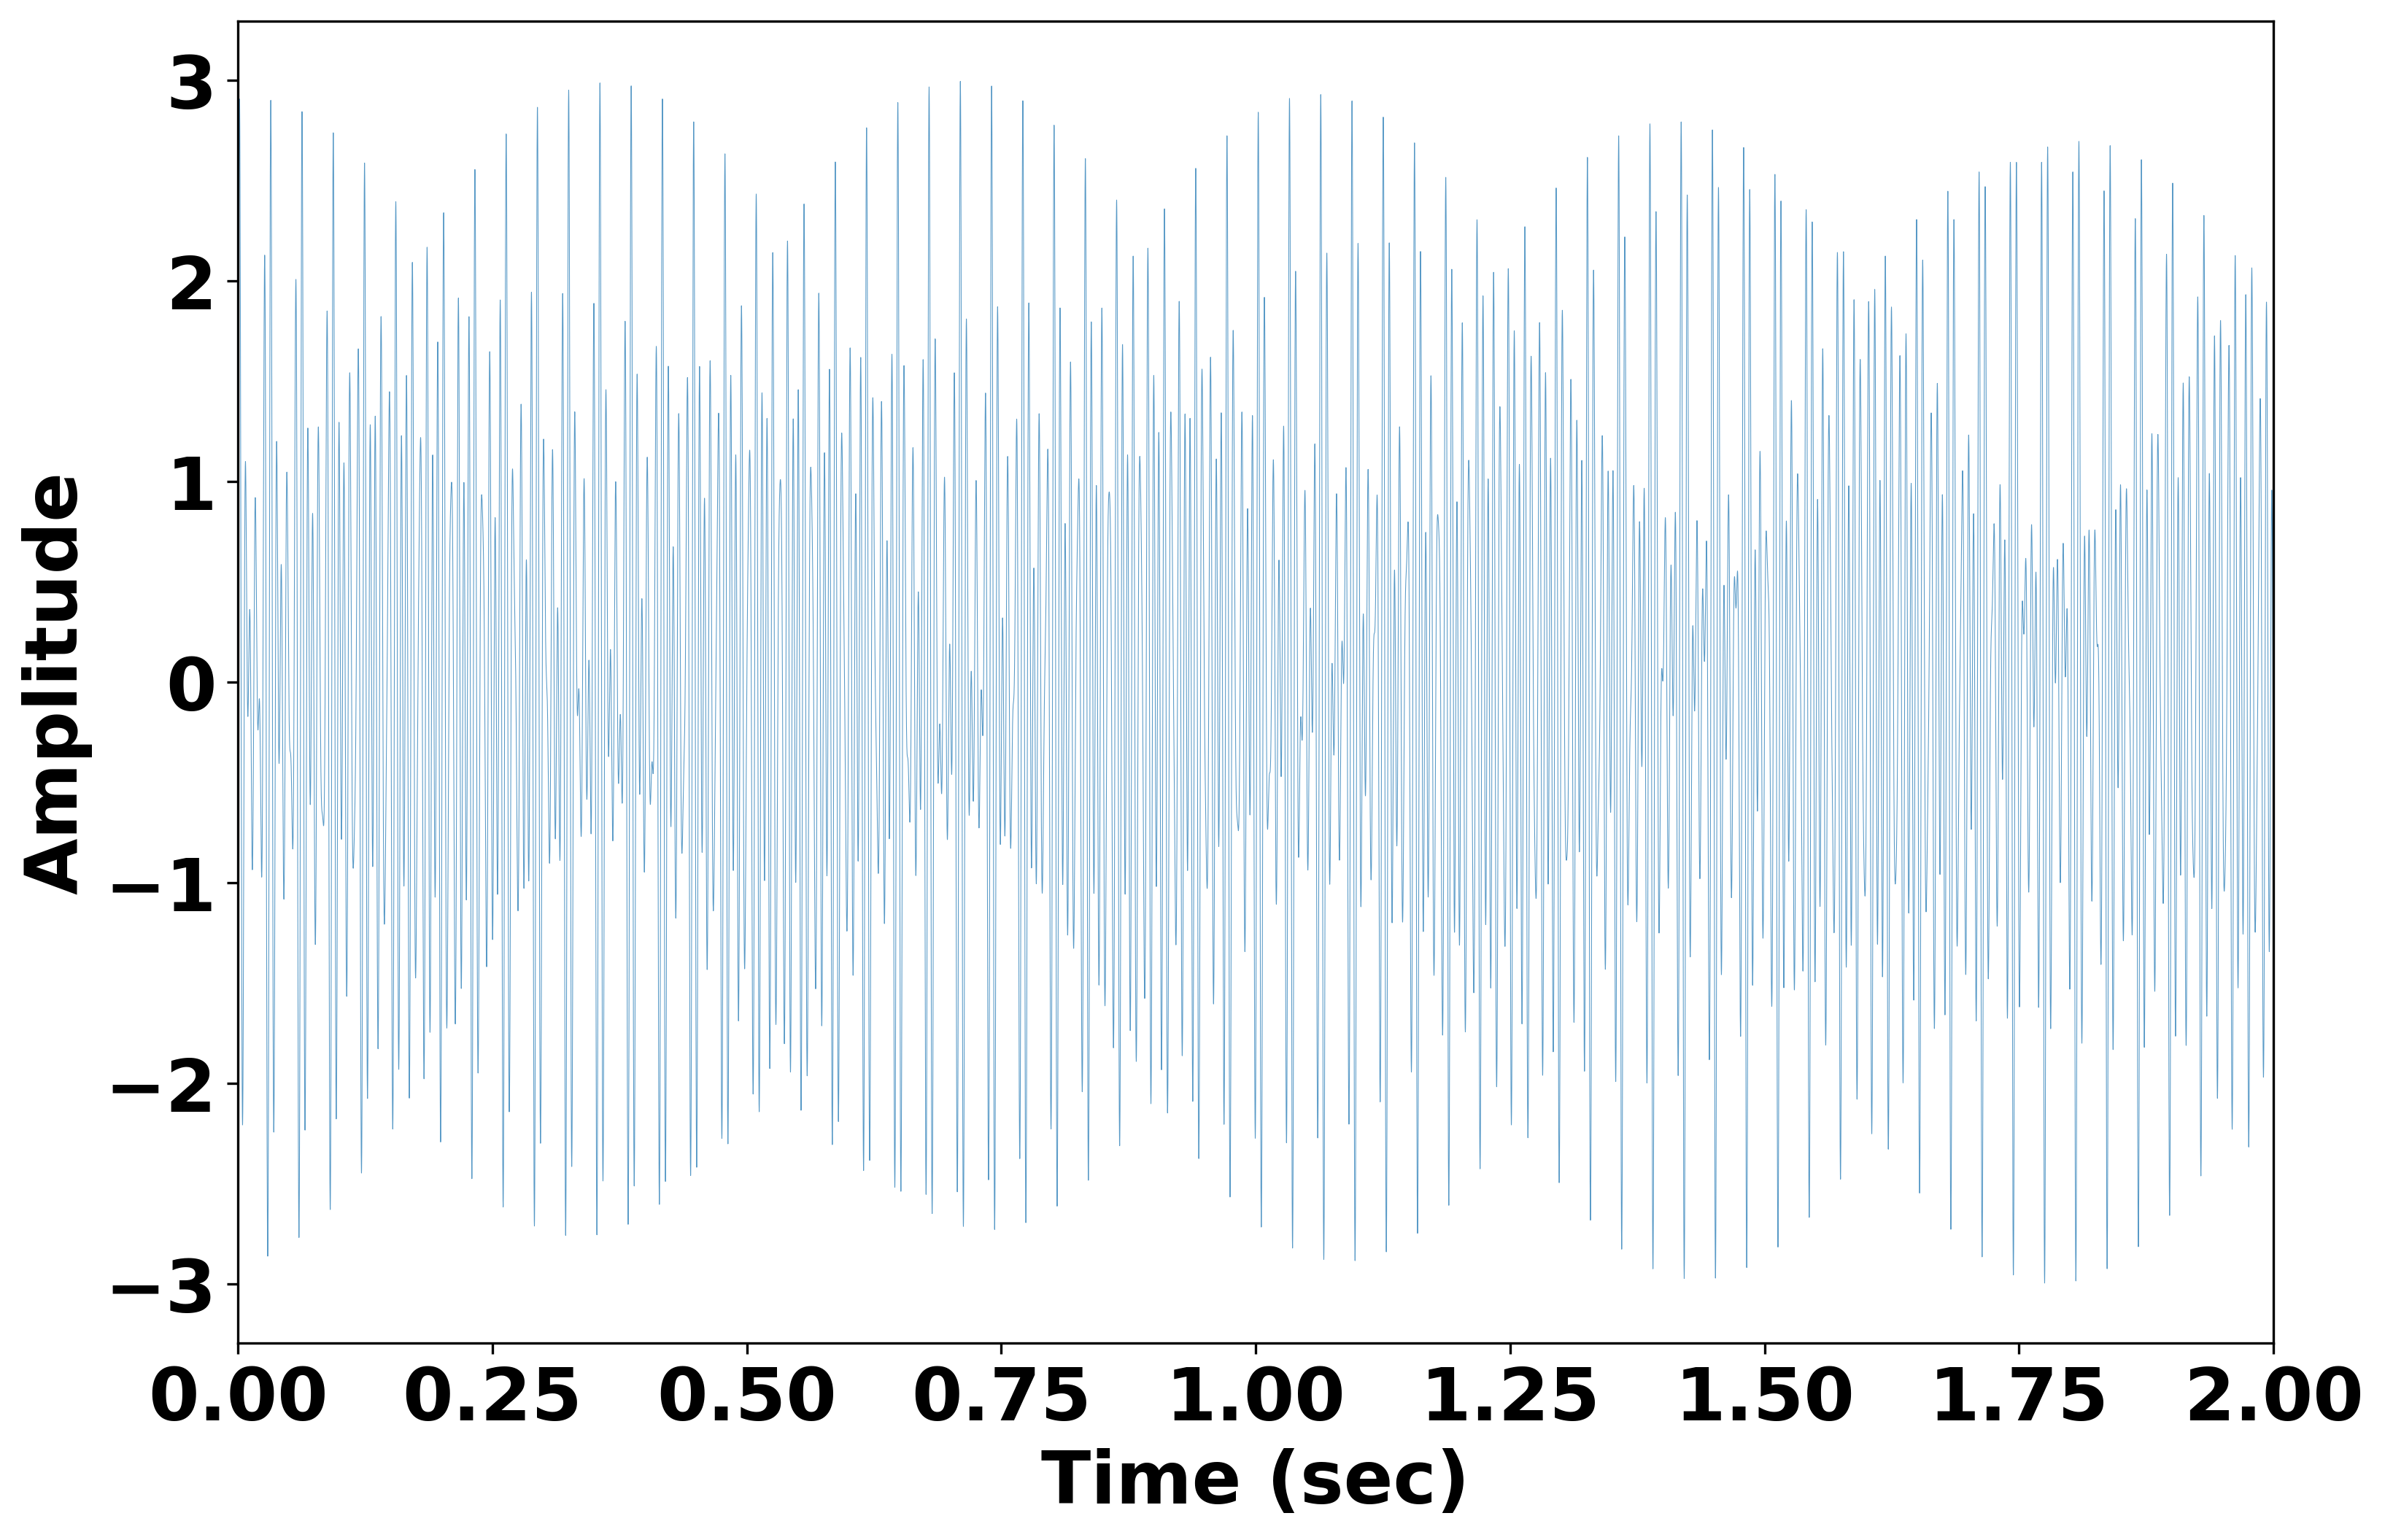

In [54]:
data = make_sin_waves(freq*np.array([1,edo_scale[5],edo_scale[7]]),t)

# 波形を図示
plt.rcParams["font.size"] = 24
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.figure(figsize=(12,8), dpi=300 )
plt.plot(t, data_edo, lw=0.25, alpha=0.75)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.xlim([0,2])
plt.show()

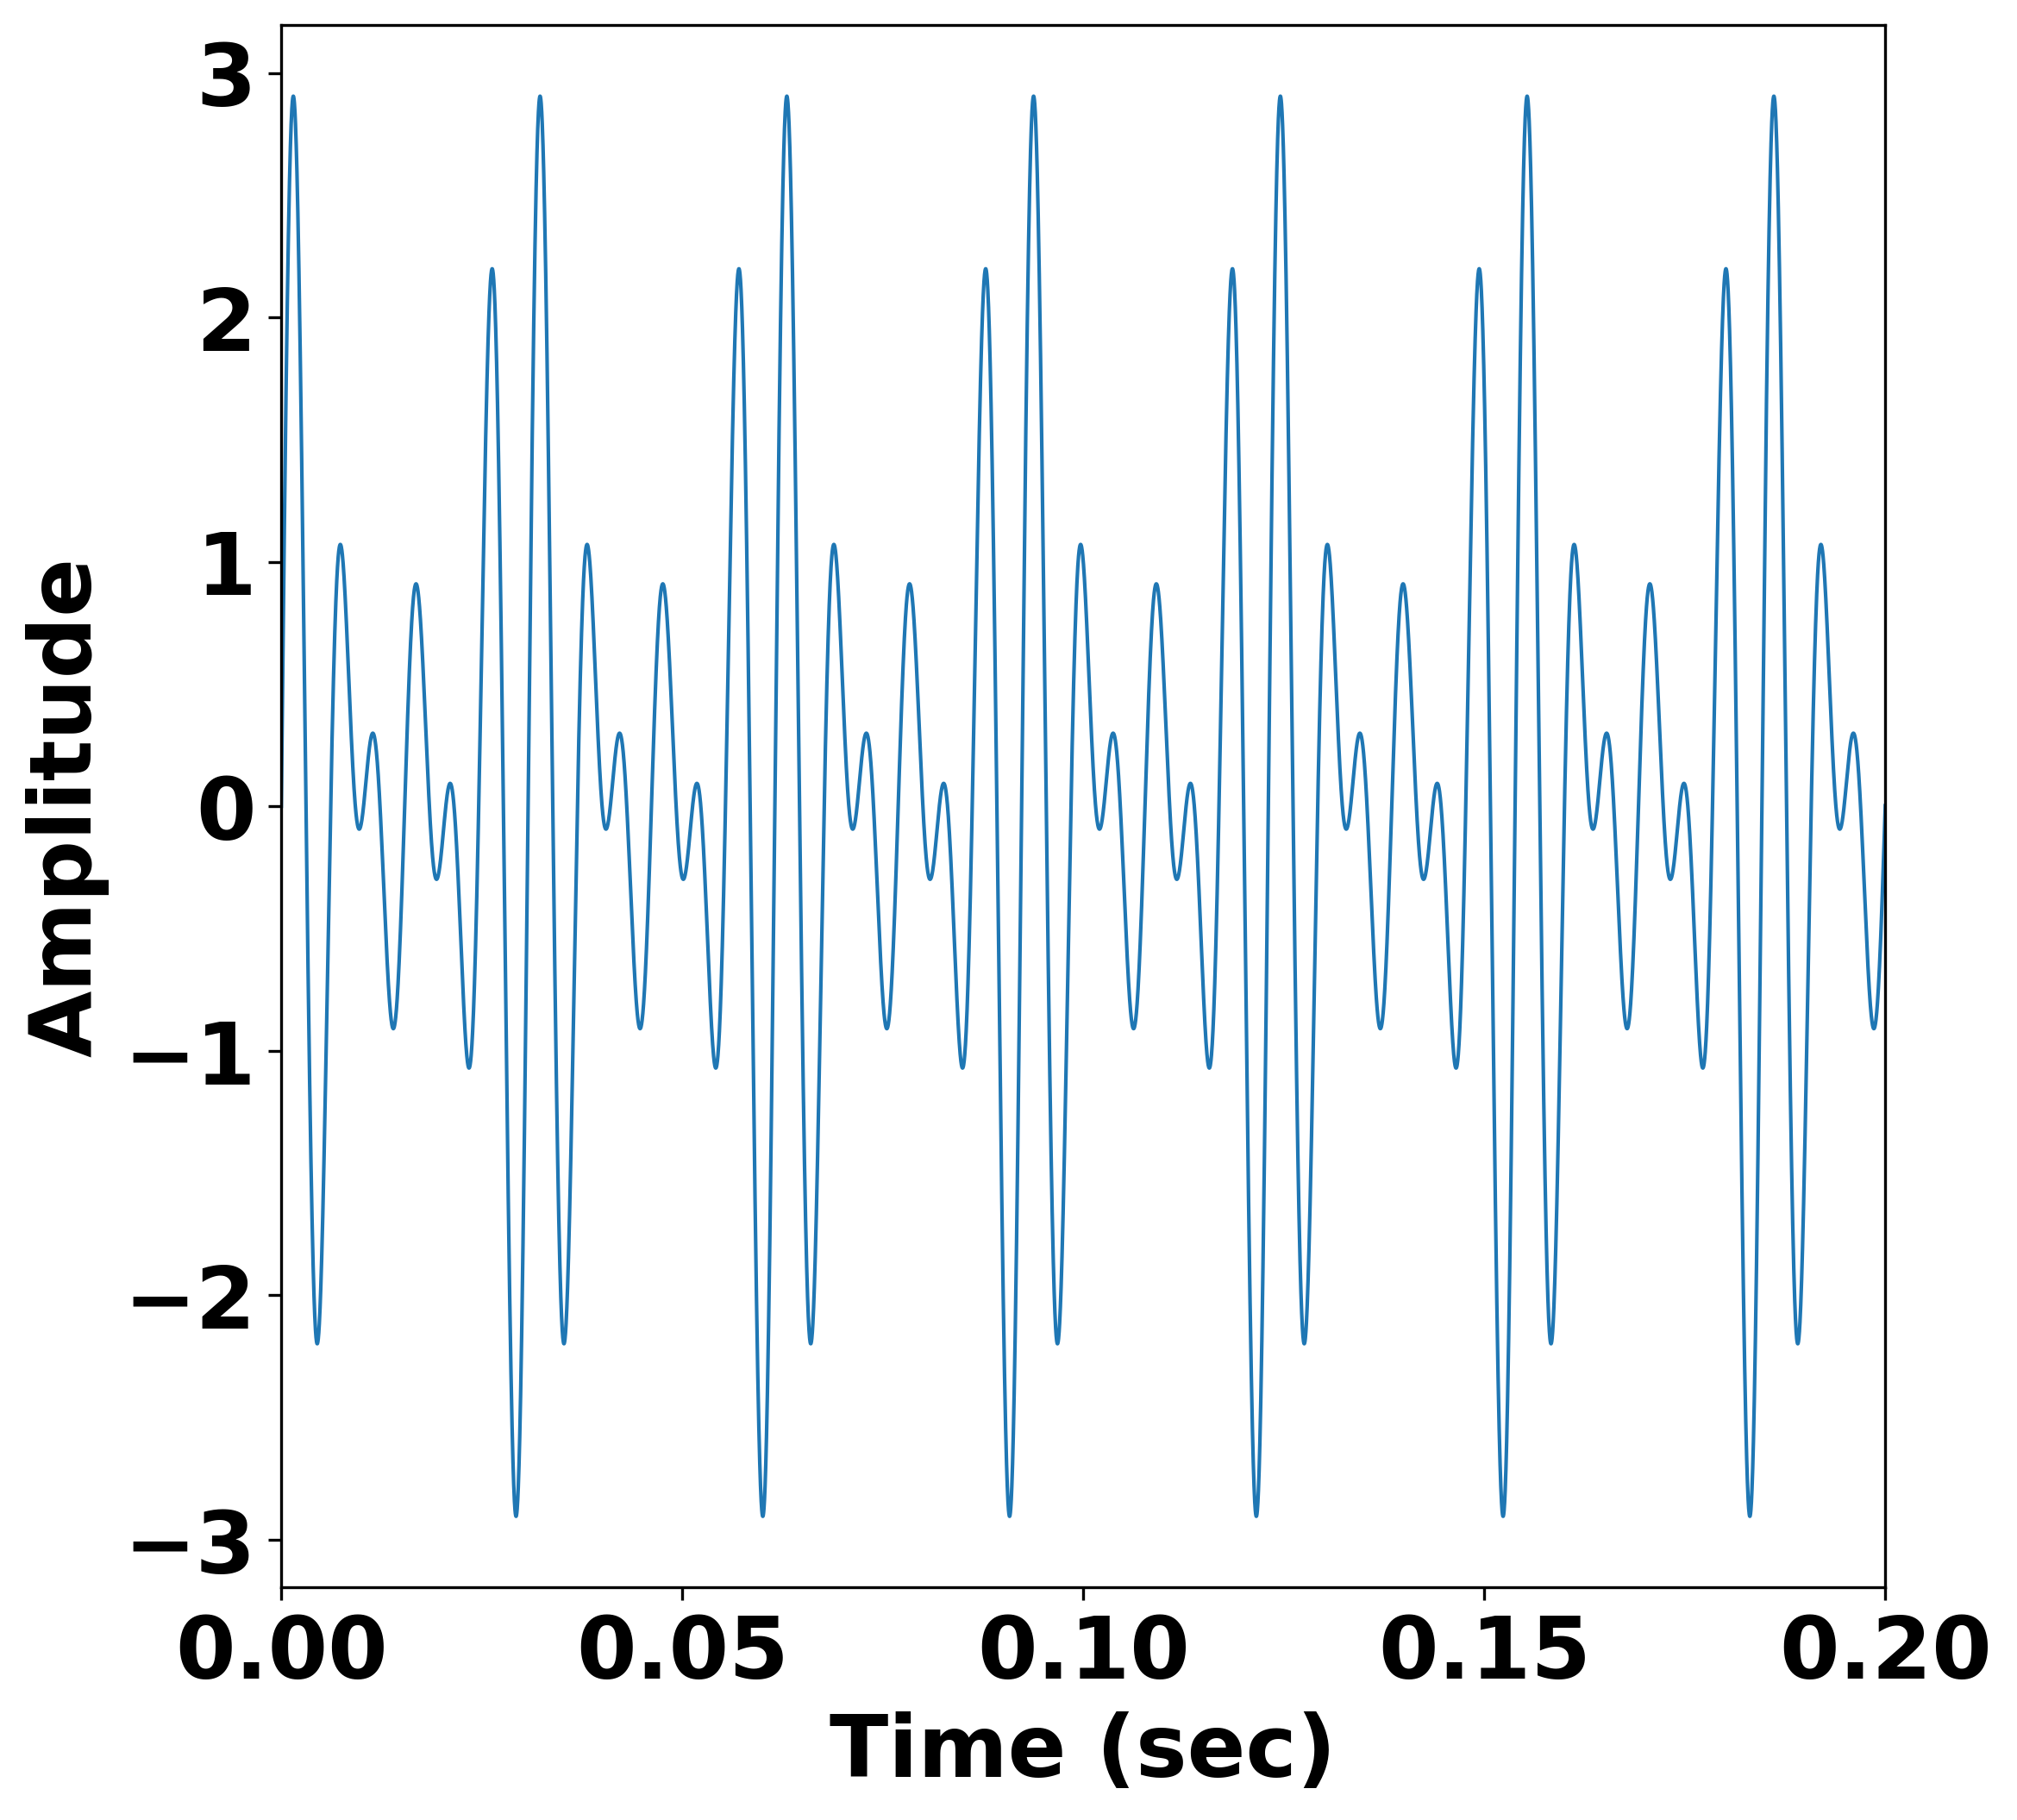

In [55]:
plt.figure(figsize=(8,8), dpi=300 )
plt.rcParams["font.size"] = 24
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.plot(t, data_pure, lw=1, alpha=1)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.xlim([0,0.2]); plt.show()

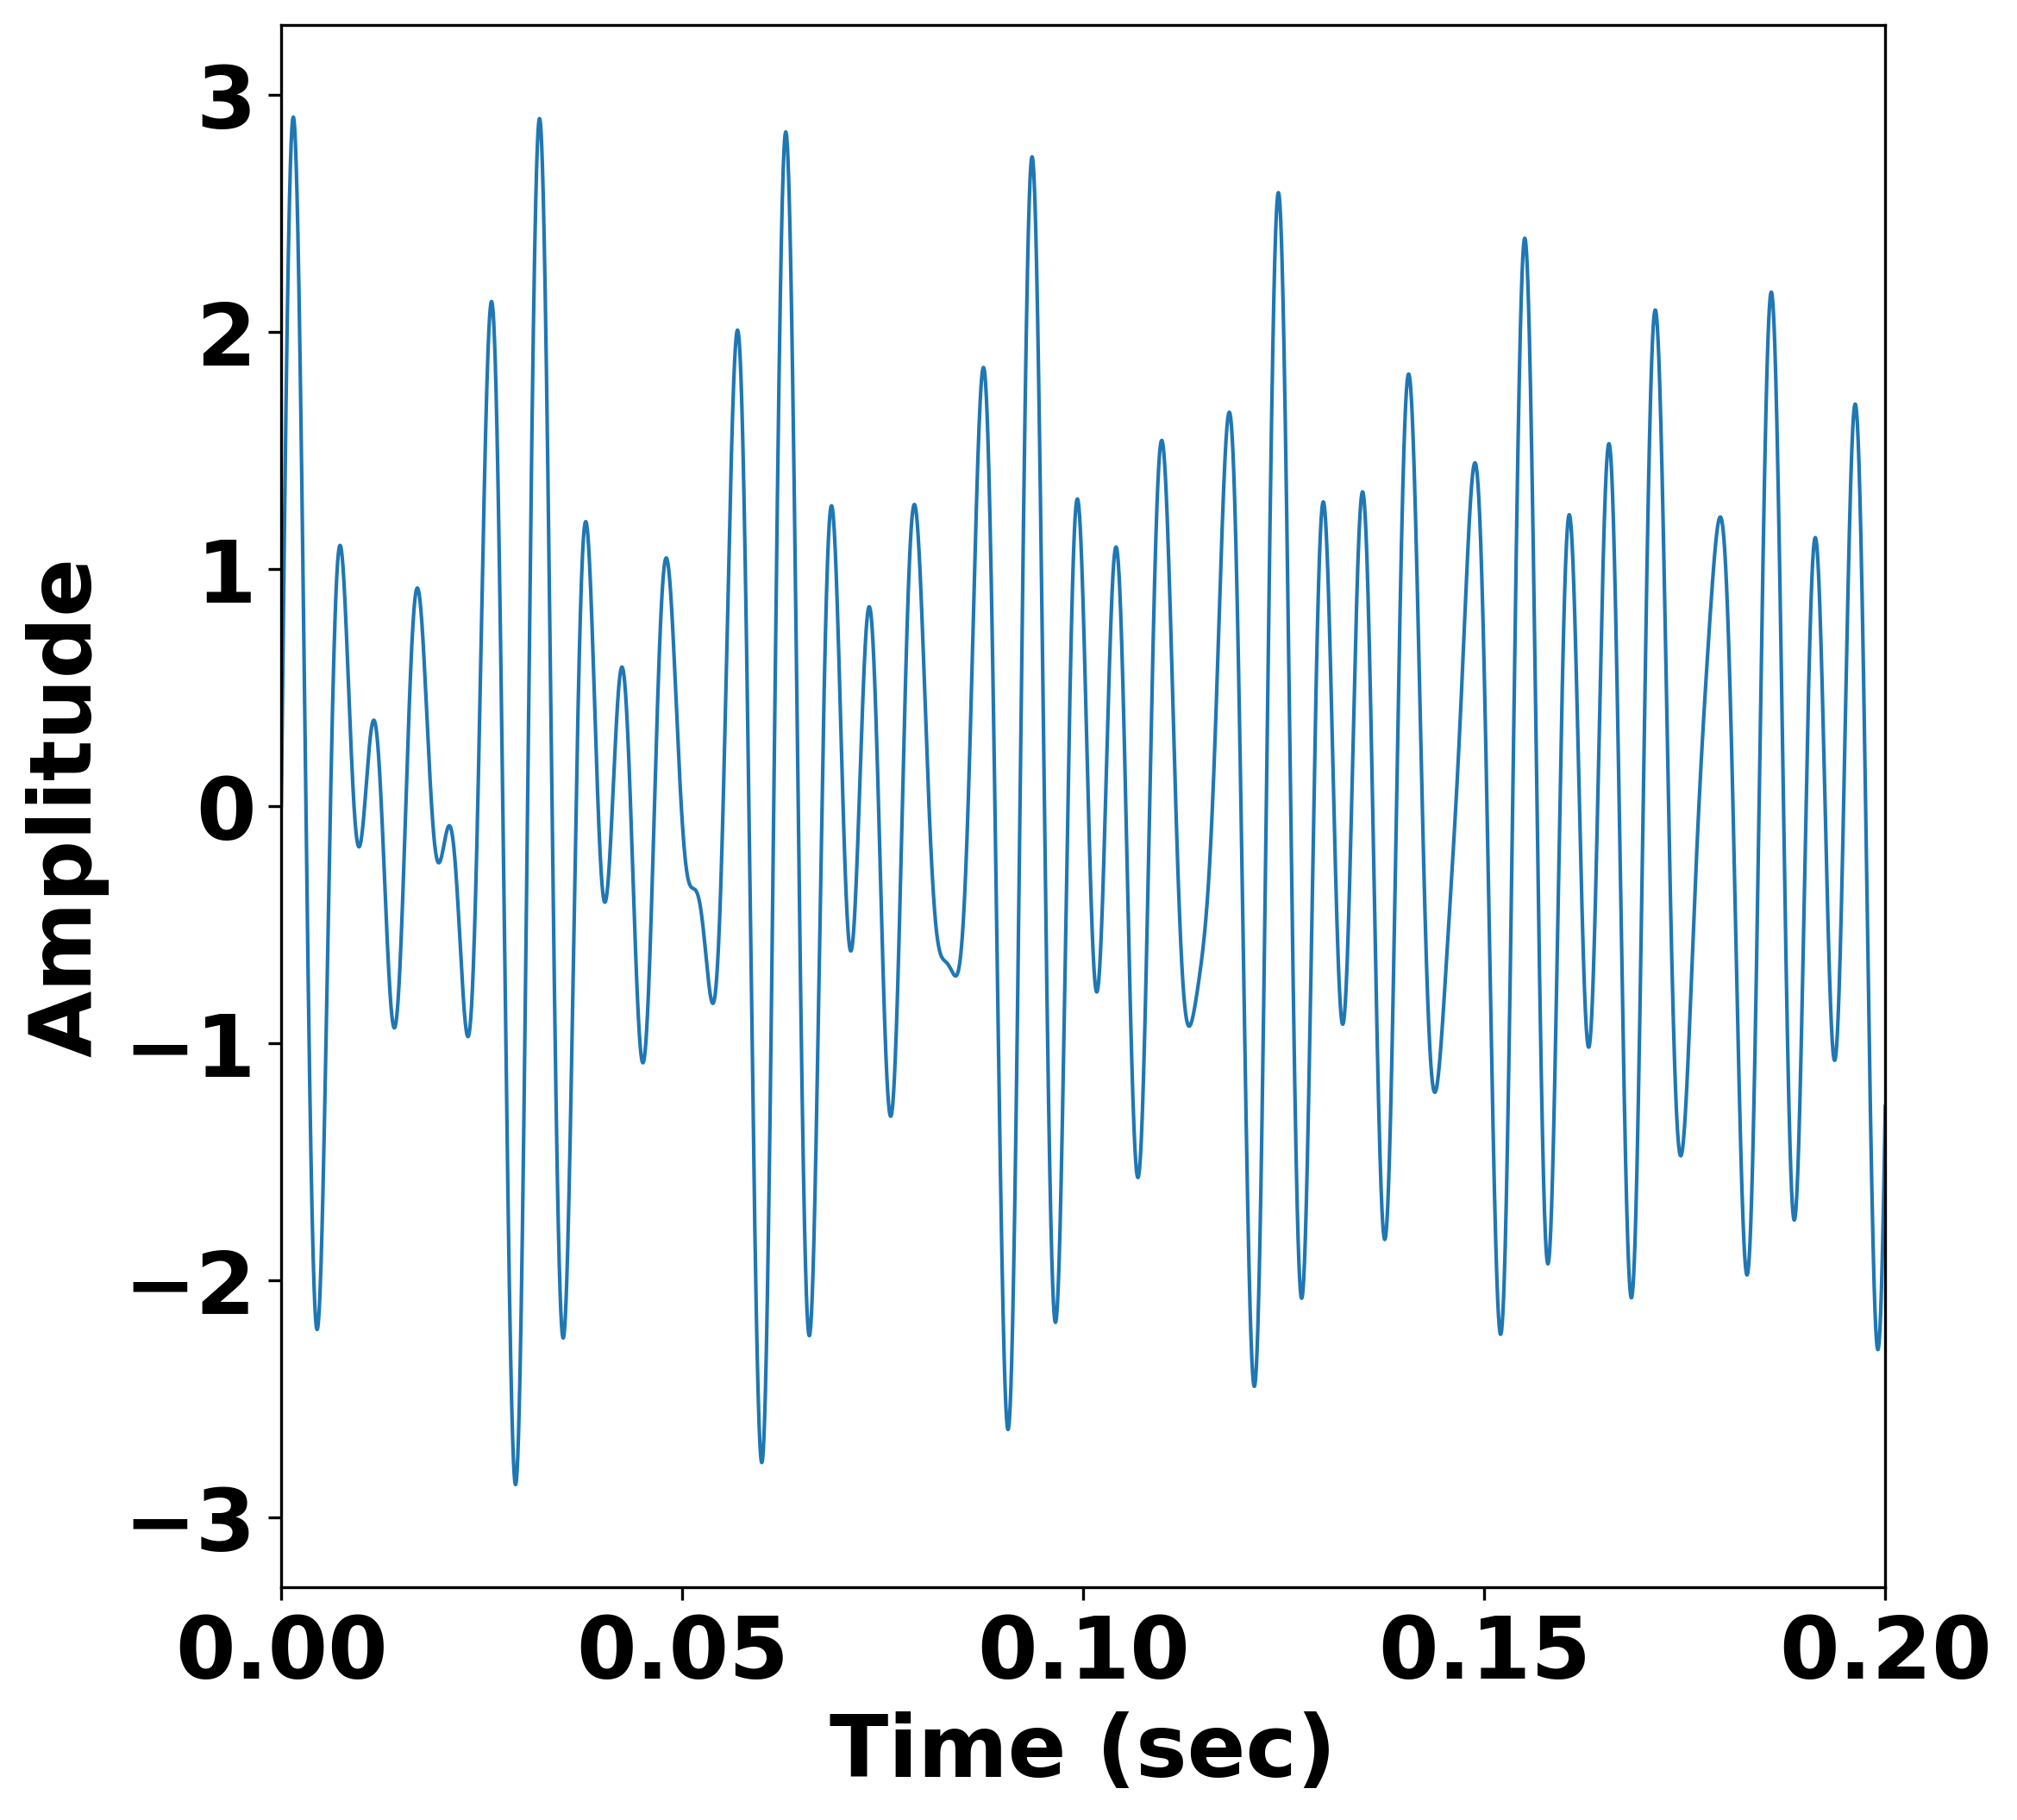

In [39]:
plt.figure(figsize=(8,8), dpi=300 )
plt.rcParams["font.size"] = 24
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.plot(t, data_edo, lw=1, alpha=1)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.xlim([0,0.2]); plt.show()

In [35]:
print( [pure_scale[i+1]/pure_scale[i] for i in range(len(pure_scale)-1)] )
print( [edo_scale[i+1]/edo_scale[i] for i in range(len(edo_scale)-1)] )

[9/8, 10/9, 16/15, 9/8, 10/9, 9/8, 16/15]
[2**(1/12), 2**(1/12), 2**(1/12), 2**(1/12), 2**(1/12), 2**(1/12), 2**(1/12), 2**(1/12), 2**(1/12), 2**(1/12), 2**(1/12), 2**(1/12)]


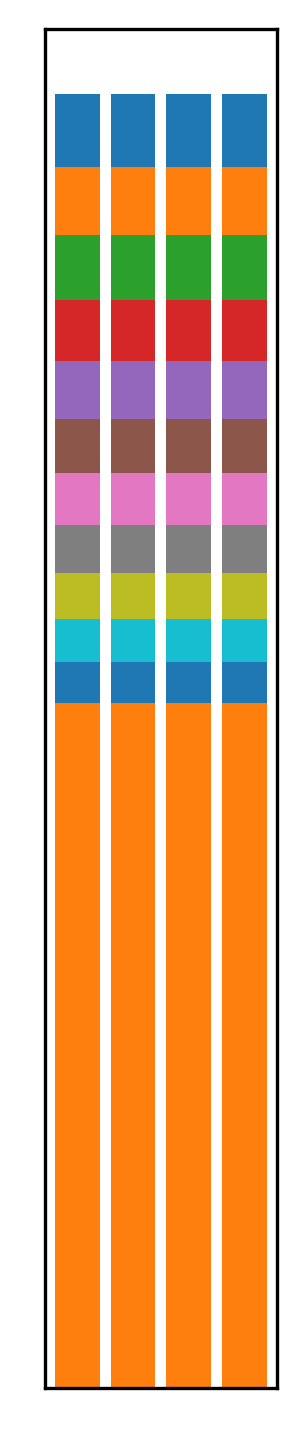

In [45]:
plt.rcParams["font.size"] = 8
plt.figure(figsize=(1,6), dpi=300 )
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

flet_max = 12
edo_scale2 = np.array([     
    np.array(edo_scale[:-1]),
    2.0*np.array(edo_scale[:-1]),
    4.0*np.array(edo_scale[:-1])]).flatten()
bridge_pos = np.array([[
    1/edo_scale2[i]*edo_scale2[0],
    1/edo_scale2[i+5]*edo_scale2[5],
    1/edo_scale2[i+9]*edo_scale2[9],
    1/edo_scale2[i+14]*edo_scale2[14]] for i in range(flet_max)])
left = np.array([1,2,3,4])
for p in bridge_pos:
    plt.bar(left, p)

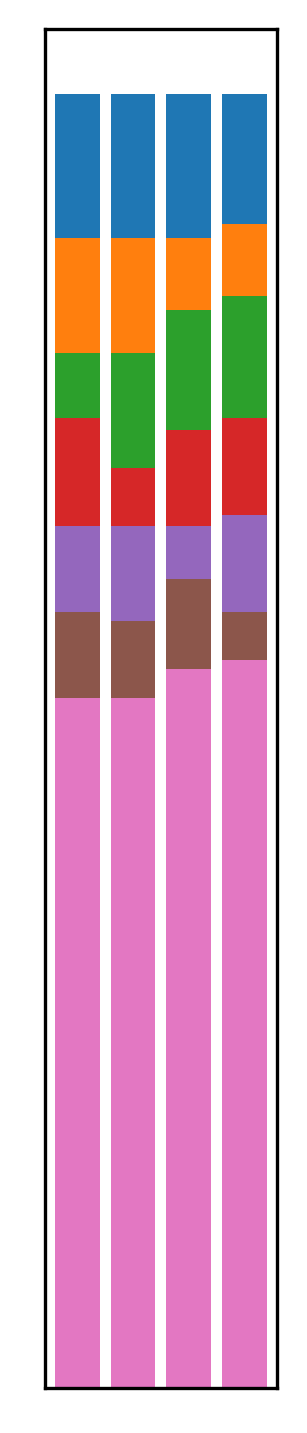

In [46]:
plt.rcParams["font.size"] = 8
plt.figure(figsize=(1,6), dpi=300 )
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# 純正律
flet_max = 7
pure_scale2 = np.array([    np.array(pure_scale[:-1]),
                        2.0*np.array(pure_scale[:-1]),
                        4.0*np.array(pure_scale[:-1])]).flatten()
bridge_pos = np.array([[1/pure_scale2[i]*pure_scale2[0],
                        1/pure_scale2[i+3]*pure_scale2[3],
                        1/pure_scale2[i+5]*pure_scale2[5],
                        1/pure_scale2[i+8]*pure_scale2[8]] for i in range(flet_max)])
left = np.array([1,2,3,4])
for p in bridge_pos:
    plt.bar(left, p)

### 3D部品作り

In [48]:
from solid import *
import viewscad
import subprocess

In [49]:
def make_cube_at_pos(size_x, size_y, size_z, x, y, z):
    return translate([x, y, z])(cube([size_x, size_y, size_z], center=True))

thickness = 2
bridge_ex_x = 10; bridge_ex_y = 33.8; bridge_ex_z = 4.2
bridge_x = bridge_ex_x-2*thickness
bridge_y = bridge_ex_y + 2*thickness
bridge_z = bridge_ex_z + 2*thickness

bridge = make_cube_at_pos(bridge_x,bridge_y,bridge_z, 0,0,0)\
        -make_cube_at_pos(bridge_ex_x,bridge_ex_y,bridge_ex_z,0,0,-thickness)

scad_render_to_file(bridge, "bridge.scad")
openscad = '/Applications/OpenSCAD.app/Contents/MacOS/OpenSCAD'
subprocess.run([openscad, 'bridge.scad','-o bridge.stl','-q'])

r = viewscad.Renderer(width=600,height=400)
r.render(bridge)

Geometries in cache: 4
Geometry cache size in bytes: 2912
CGAL Polyhedrons in cache: 1
CGAL cache size in bytes: 22096
Total rendering time: 0:00:00.098
   Top level object is a 3D object:
   Simple:        yes
   Vertices:       16
   Halfedges:      48
   Edges:          24
   Halffacets:     20
   Facets:         10
   Volumes:         2
/Users/jun/.espressif/python_env/idf5.0_py3.7_env/lib/python3.7/site-packages/jupyter_client/session.py:716: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [50]:
from solid import *
import viewscad
import subprocess

def make_cube_at_pos(size_x, size_y, size_z, x, y, z):
    return translate([x, y, z])(cube([size_x, size_y, size_z], center=True))

total_len = 185
neck_y = 24

thickness = 2
bridge_ex_x = 12; bridge_ex_y = 33.8; bridge_ex_z = 4.2
bridge_x = bridge_ex_x-2*thickness
bridge_y = bridge_ex_y + 2*thickness
bridge_z = bridge_ex_z + 2*thickness

bridge = make_cube_at_pos(bridge_x,bridge_y,bridge_z, 0,0,bridge_z/2)\
        -make_cube_at_pos(bridge_ex_x,bridge_ex_y,bridge_ex_z,0,0,bridge_z/2-thickness)

scad_render_to_file(bridge, "bridge.scad")
openscad = '/Applications/OpenSCAD.app/Contents/MacOS/OpenSCAD'
subprocess.run([openscad, 'bridge.scad','-o bridge.stl','-q'])

n = 4
c = bridge
for j in range(n): # 弦
    for i in range(flet_max): # フレット
        pos = total_len*bridge_pos[i][j]
        h = 2+0.5*(total_len-pos)/total_len*bridge_z
        c = c + make_cube_at_pos(
                2,
                neck_y/n,
                h,  # 5 
                pos,
                -(j-1.5)*neck_y/n,
                h/2)  # 5/2
for j in range(n+1):
    c = c + make_cube_at_pos(
        total_len/2, 2, 2, 
        total_len*3/4, -(j-2)*neck_y/n, 2/2)

scad_render_to_file(c, "all.scad")
openscad = '/Applications/OpenSCAD.app/Contents/MacOS/OpenSCAD'
subprocess.run([openscad, 'all.scad','-o all.stl','-q'])

r = viewscad.Renderer(width=600,height=400)
r.render(c)

Geometries in cache: 55
Geometry cache size in bytes: 40040
CGAL Polyhedrons in cache: 2
CGAL cache size in bytes: 566472
Total rendering time: 0:00:06.093
   Top level object is a 3D object:
   Simple:        yes
   Vertices:      405
   Halfedges:    1220
   Edges:         610
   Halffacets:    370
   Facets:        185
   Volumes:         3
